<a href="https://colab.research.google.com/github/catavasia/ML_FIAN-21/blob/main/seminar10_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.7.0


# Classifying clothes

[['Pullover' 'Trouser' 'Bag' 'Coat' 'Trouser']
 ['Ankle boot' 'Pullover' 'Pullover' 'T-shirt/top' 'Pullover']
 ['Shirt' 'Ankle boot' 'T-shirt/top' 'Sneaker' 'Sandal']
 ['Coat' 'T-shirt/top' 'Trouser' 'Bag' 'T-shirt/top']
 ['Coat' 'Pullover' 'Shirt' 'Sneaker' 'T-shirt/top']]


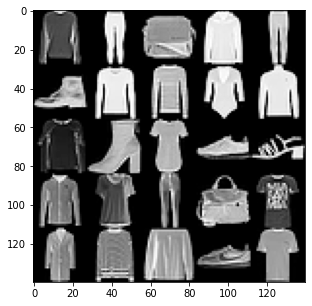

In [ ]:
import tensorflow_datasets as tfds

data_train = tfds.load(name="fashion_mnist", split="train").prefetch(60000).cache()
data_test  = tfds.load(name="fashion_mnist", split="test" ).prefetch(10000).cache()

# Array for decoding the categories
label_names = np.array(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle boot'])

# Get a single data batch of 25 images
sample_data = next(iter(data_train.batch(25)))
sample_images = sample_data['image']
sample_labels = sample_data['label']

# Plot the images in a 5x5 grid
plt.figure(figsize=(5, 5))
plt.imshow(
    sample_images.numpy().reshape(5, 5, 28, 28).transpose((0, 2, 1, 3)).reshape(140, 140),
    cmap='gray'
)
# Print corresponding labels
print(label_names[sample_labels.numpy().reshape(5, 5)])

In [ ]:
def unwrap(x):
  return (x['image'], x['label'])

batch_size = 1024

In [ ]:
x=data_train.map(unwrap).shuffle(60000).batch(batch_size)

In [ ]:
x

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.int64)>

**Task**:

Train a model which is an average of two models with different numbers of layers on the Fashion MNIST dataset, e.g.:

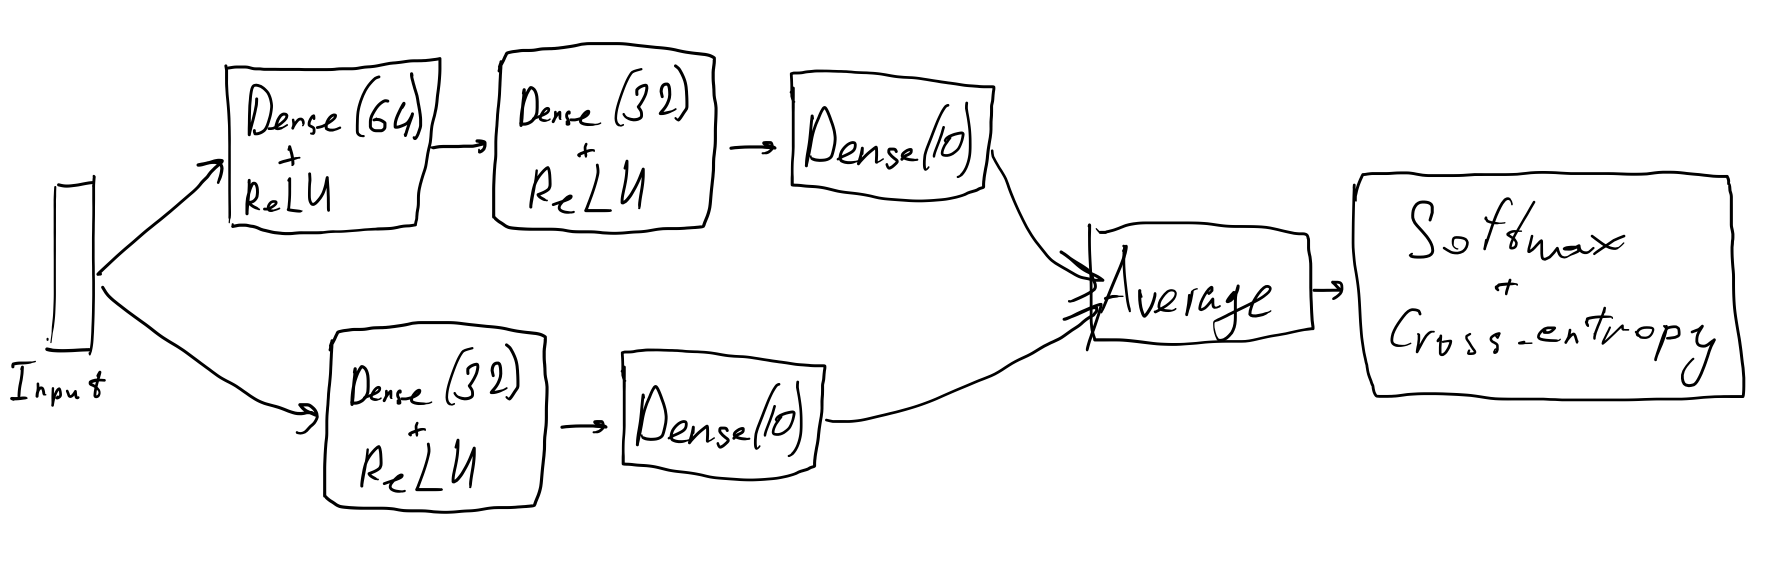

You can:
 - either use low-level API for that (still using `tf.keras.Sequential` models as building blocks)
 - or use `tf.keras.Model` for an arbitrary model (see examples from https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [ ]:
inputs = tf.keras.Input(shape=(28, 28, 1))

prep = tf.keras.layers.Lambda(
    lambda x: tf.reshape(x / 255., (-1, 28*28)),
    input_shape=(28, 28, 1), name='preprocessing'
  )(inputs)

N_1 = tf.keras.layers.Dense(64, activation='relu', name='NN1_layer_1')(prep)
N_2 = tf.keras.layers.Dense(32, activation='relu', name='NN1_layer_2')(N_1)
N_3 = tf.keras.layers.Dense(10, name='NN1_layer_3')(N_2)

n_1 = tf.keras.layers.Dense(32, activation='relu', name='NN2_layer_1')(prep)
n_2 = tf.keras.layers.Dense(10, name='NN2_layer_2')(n_1)


average = tf.keras.layers.Average(name='average')([N_3, n_2])

outputs = tf.keras.layers.Dense(10, activation='softmax', name='softmax')(average)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 preprocessing (Lambda)         (None, 784)          0           ['input_18[0][0]']               
                                                                                                  
 NN1_layer_1 (Dense)            (None, 64)           50240       ['preprocessing[0][0]']          
                                                                                                  
 NN1_layer_2 (Dense)            (None, 32)           2080        ['NN1_layer_1[0][0]']            
                                                                                            

In [ ]:
model.compile(optimizer='rmsprop',
            loss=tf.losses.SparseCategoricalCrossentropy(),
            metrics='accuracy')

In [ ]:
saver = tf.keras.callbacks.ModelCheckpoint(filepath='model_best.h5',
                                            monitor='val_accuracy',
                                            save_best_only=True)

history = model.fit(x=data_train.map(unwrap).shuffle(60000).batch(batch_size),
          epochs=10,
          validation_data=data_test.map(unwrap).batch(4096),
          callbacks=[saver])

Epoch 1/10
59/59 [==============================] - 11s 36ms/step - loss: 0.3931 - accuracy: 0.8622 - val_loss: 0.4168 - val_accuracy: 0.8518
Epoch 2/10
 8/59 [===>..........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.8680

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


59/59 [==============================] - 1s 9ms/step - loss: 0.3772 - accuracy: 0.8667 - val_loss: 0.4153 - val_accuracy: 0.8512
Epoch 3/10
59/59 [==============================] - 1s 10ms/step - loss: 0.3663 - accuracy: 0.8706 - val_loss: 0.3943 - val_accuracy: 0.8611
Epoch 4/10
59/59 [==============================] - 1s 10ms/step - loss: 0.3608 - accuracy: 0.8710 - val_loss: 0.3873 - val_accuracy: 0.8628
Epoch 5/10
59/59 [==============================] - 1s 9ms/step - loss: 0.3508 - accuracy: 0.8734 - val_loss: 0.4197 - val_accuracy: 0.8510
Epoch 6/10
59/59 [==============================] - 1s 10ms/step - loss: 0.3468 - accuracy: 0.8762 - val_loss: 0.4115 - val_accuracy: 0.8562
Epoch 7/10
59/59 [==============================] - 1s 9ms/step - loss: 0.3396 - accuracy: 0.8786 - val_loss: 0.3987 - val_accuracy: 0.8584
Epoch 8/10
59/59 [==============================] - 1s 10ms/step - loss: 0.3328 - accuracy: 0.8802 - val_loss: 0.3877 - val_accuracy: 0.8616
Epoch 9/10
59/59 [=========

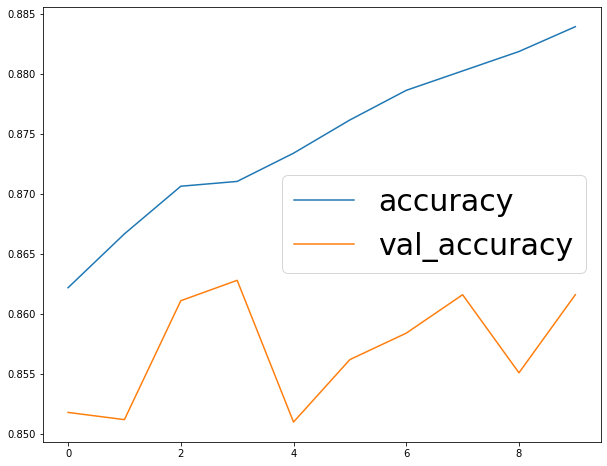

In [ ]:
plt.figure(figsize=(10,8))
plt.plot( history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(fontsize=30)